In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

We'll use statsmodels to fit some (Ordinary Least Squares) linear models using random data.

First make a response y of 200 random numbers. Then generate 20 random features in an X to predict with. Fit a linear model using both the 'Famous Equation' and the python built-ins. Check the summary() output of the results from the python built-ins. Do you have any features with P>|t| less than 0.05? (Repeat the process until you have at least one.)

Check out the model's R-squared and Adj. R-squared. Repeat the feature generation and model fitting process with 40, 60, 80, and 100 features. What happens with R-squared and Adj. R-squared?

If you have time, automate this experimental procedure and make a plot of R-squared and Adj. R-squared against number of features for one to one hundred features.

In [12]:
y = np.random.randint(0,100+1, 100)

In [19]:
y

array([43, 63,  2,  4, 73, 61, 52, 72,  2, 42, 97, 38, 34, 38, 29, 84, 32,
       16, 16, 11, 56, 32, 27, 63,  5, 94, 87, 14,  1, 32, 54, 63, 51, 14,
       83,  4, 19, 30,  1, 74, 32, 89, 83,  4, 15, 90, 39, 79,  8, 31, 23,
       46, 98,  8, 20, 23, 88, 29, 59,  7, 74, 91, 25, 18, 53,  1,  0, 68,
       99, 95, 94, 76, 91, 37, 62, 37, 53, 53, 38, 73, 90, 17, 28, 72,  3,
       20, 63, 88, 19,  4, 17, 59, 72, 70, 39, 71, 83, 97, 96, 77])

In [20]:
df = pd.DataFrame()

In [21]:
df['y'] = y

In [ ]:
y, X = patsy.dmatrices('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X*', data=df, return_type="dataframe")

In [136]:
def create_list_of_cols(num_cols):
    list_of_cols = []
    for i in range(0, num_cols + 1):
        if i == 0:
            colname = 'Y'
            list_of_cols.append(colname)
        else:
            colname = 'X' + str(i)
            list_of_cols.append(colname)
    return list_of_cols

In [137]:
create_list_of_cols(15)

['Y',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15']

In [146]:
def produce_random_model(num_features):
   

    list_of_cols = ['Y']
    model_string = 'Y ~ '
    for i in range(1, num_features + 1):
        colname = 'X' + str(i)
        list_of_cols.append(colname)
        model_string += colname + ' + '
    model_string = model_string[:-3]
#     print(model_string)
    
    df = pd.DataFrame(np.random.randint(0,100,size=(100, num_features + 1)), columns=list_of_cols)

    y, X = patsy.dmatrices(model_string, data=df, return_type="dataframe")

    # Create your model
    model = sm.OLS(y, X)
    
    return model, df

In [140]:
pd.DataFrame(np.random.randn(100,2),columns=['yy','xx'])

,yy,xx
0,0.817225,0.312844
1,1.856175,0.392217
2,-2.104274,0.612787
3,-0.611316,0.906281
4,-0.509601,0.930213
5,0.209287,0.079934
6,0.576686,-0.553434
7,0.630559,0.154571
8,-0.617865,-0.458724
9,-0.421336,1.173993


In [132]:
feature_list = [20,40,60,80]
rsq_list = []; rsqadj_list = []
for n in feature_list:
    model, df = produce_random_model(n);
    fit = model.fit();

    rsq_list.append(fit.rsquared)
    rsqadj_list.append(fit.rsquared_adj)

In [133]:
rsq_list

[0.14361453381855604,
 0.38875773408144454,
 0.5719474033873512,
 0.7424658881251697]

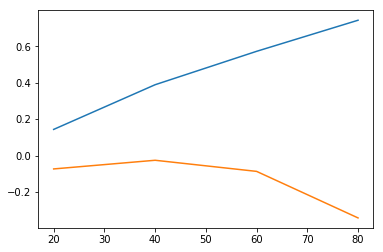

In [134]:
plt.plot(feature_list,rsq_list,feature_list,rsqadj_list)

In [98]:
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
0,36,45,1,62,52,75,25,61,67,59,...,36,41,26,78,67,78,67,75,28,77
1,35,63,10,60,69,40,44,31,59,41,...,13,29,79,79,87,6,18,30,55,81
2,45,4,67,87,75,60,21,73,93,60,...,6,26,91,72,0,20,55,32,76,13
3,49,23,27,73,87,7,88,62,33,91,...,41,45,32,74,77,17,48,65,16,88
4,10,52,25,36,49,95,5,51,91,39,...,40,19,51,74,23,51,95,71,21,80
5,96,37,46,45,19,6,62,33,79,65,...,85,84,55,31,48,86,73,99,63,77
6,89,49,62,6,44,96,9,93,23,58,...,85,93,28,93,87,99,77,52,11,31
7,62,34,10,20,74,71,9,12,59,19,...,57,54,0,12,5,97,67,90,27,19
8,14,14,97,48,82,13,20,7,7,35,...,97,59,67,7,82,19,98,62,72,53
9,91,19,53,50,85,60,79,89,45,0,...,22,13,40,35,11,14,71,32,80,2
